In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import operator as op
import itertools
import matplotlib.pyplot as plt
import numpy.linalg
import cmath
import multiprocessing
import itertools
import scipy.optimize as optimize
import csv
%matplotlib inline

In [7]:
#Dummy Data set
dummy=pd.DataFrame([['a', 'c', 1988],
                    ['c', 'g', 1989],
                    ['a', 'k', 1989],
                    ['g', 'a', 1990],
                    ['a', 't', 1991],
                    ['t', 'l', 1992],
                    ['a', 'b', 1993],
                    ['c', 'b', 1993],
                    ['g', 'k', 1994],
                    ['p', 'k', 1994],
                    ['a', 'c', 1995],
                    ['p', 'c', 1995],
                    ['g', 'c', 1995],
                    ['l', 'n', 1995],
                    ['c', 't', 1995],
                    ['p', 'r', 1996],
                    ['p', 'k', 1996],
                    ['t', 'a', 1996],
                    ['r', 'l', 1997],
                    ['g', 'w', 1997],
                    ['r', 'c', 1998],
                    ['p', 'q', 1998],
                    ['r', 'g', 1998]],columns = ["source_id", "target_id", "timestamp"])    

dummy.source_id = dummy.source_id.astype(str)
dummy.target_id = dummy.target_id.astype(str)
t_min=dummy.timestamp.min()
t_max=dummy.timestamp.max()
N=10
dataset = dummy

In [8]:
def create_intervals(dataset,N):


    t_min=dataset.timestamp.min()
    t_max=dataset.timestamp.max()


    dt=(t_max-t_min)/N
    
    intervals=[]
    for j in range(0,N):

        #Start of time interval
        tj=t_min + j*dt
        
        #End of time interval
        tj1=t_min +(j+1)*dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

In [9]:
print(create_intervals(dataset,4))

[[1988, 1990], [1990, 1993], [1993, 1995], [1995, 1998]]


In [10]:
class graph(object):
    def __init__(self,dataset, t0,t1):
        self.t0 = t0
        self.t1 = t1
        self.dataset = dataset
        self.create_graph()
        self.interval=[t0,t1]
        
    def create_graph(self):
        self.batch = self.create_batch()
        self.graph = nx.from_pandas_edgelist(self.batch, 'source_id', 'target_id')
        

    def create_batch(self):
        
        df_indexes=[]
        index = 0
        self.dataset = self.dataset.reset_index(drop=True)
            
        if self.t1 == self.dataset.timestamp.max():
            while index < len(self.dataset)and self.dataset.timestamp[index]<=self.t1 :
                if self.dataset.timestamp[index]>=self.t0:
                    df_indexes.append(index)
                    
                index = index +1

            batch = self.dataset.iloc[df_indexes]

            return(batch)

        else:
            while index < len(self.dataset)and self.dataset.timestamp[index]<self.t1 :
                if self.dataset.timestamp[index]>=self.t0:
                    df_indexes.append(index)
                    
                index = index +1

            batch = self.dataset.iloc[df_indexes]
            
            return(batch)

In [11]:
#returns the number of nodes in each time slice
def graph_vertices_volume(dataset,N):
    
    time_intervals = create_intervals(dataset,N)
    nodes_count_list=[]

    for time_interval in time_intervals:
        G=graph(dataset, time_interval[0], time_interval[1])
        nodes_count_list.append(len(G.graph.nodes()))
        
    return(nodes_count_list)

#draw graph of vertice frequency for each time slice
def vertices_graph(dataset,N):
    T=[]

    time_intervals = create_intervals(dataset,N)
    for time_interval in time_intervals:
        T.append(time_interval[0])

    x = T  
    #print(x)
    y = graph_vertices_volume(dataset,N)

    N = len(y)
    #x = range(N)
    #print(x)
    width = 1.5
    
    plt.subplot(1, 2, 1)
    plt.title('Vertices Histogram')
    plt.xlabel('Time Intervals Bins')
    plt.ylabel('Number of Vertices')
    plt.bar(x, y, align='edge',color="blue")

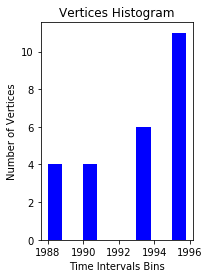

In [12]:
vertices_graph(dataset,4)

In [13]:
#returns number of edges in each time slice
def graph_edges_volume(dataset,N):
    
    time_intervals = create_intervals(dataset,N)
    edges_count_list=[]

    for time_interval in time_intervals:
        G=graph(dataset, time_interval[0], time_interval[1])
        edges_count_list.append(len(G.graph.edges()))
        #print(G.graph.edges())
        #print(time_interval)
        
    return(edges_count_list)

#draw graph of edge frequency for each time slice
def edges_graph(dataset,N):
    T=[]

    time_intervals = create_intervals(dataset,N)
    for time_interval in time_intervals:
        T.append(time_interval[0])

    x = T  
    y = graph_edges_volume(dataset,N)

    N = len(y)
   # x = range(N)
    width = 1/1.5
    
    plt.subplot(1, 2, 2)
    plt.title('Edges Histogram')
    plt.xlabel('Time Intervals Bins')
    plt.ylabel('Number of Edges')
    plt.bar(x, y, align='edge',color="magenta")

In [14]:
def graph_creator(dataset, n, N):
    data_rows = len(dataset)
    step = round(data_rows/n)+1
    print(step)
    start=0
    stop=step
    for pointer in range(0,data_rows,step):
        
        vertices_graph(dataset.iloc[start:stop],N)
        edges_graph(dataset.iloc[start:stop],N)
        print(start,stop,pointer)
        
        plt.tight_layout()
        plt.show()
        plt.clf()
        
        start = start + step
        stop = start + step

In [15]:
dc = nx.degree_centrality(G.graph)
cc = nx.closeness_centrality(G.graph)
bc = nx.betweenness_centrality(G.graph)
ec = nx.eigenvector_centrality_numpy(G.graph)
print(dc,cc,bc,ec,G.graph.nodes())

NameError: name 'G' is not defined

In [16]:
time_intervals = create_intervals(dataset,1)
for time_interval in time_intervals:
    G=graph(dataset, time_interval[0], time_interval[1])


In [17]:
dc = nx.degree_centrality(G.graph)
cc = nx.closeness_centrality(G.graph)
bc = nx.betweenness_centrality(G.graph)
ec = nx.eigenvector_centrality_numpy(G.graph)
print(dc,cc,bc,ec,G.graph.nodes())

{'a': 0.4545454545454546, 'c': 0.5454545454545454, 'g': 0.4545454545454546, 'k': 0.2727272727272727, 't': 0.2727272727272727, 'l': 0.2727272727272727, 'b': 0.18181818181818182, 'p': 0.36363636363636365, 'n': 0.09090909090909091, 'r': 0.36363636363636365, 'w': 0.09090909090909091, 'q': 0.09090909090909091} {'a': 0.5789473684210527, 'c': 0.6470588235294118, 'g': 0.5789473684210527, 'k': 0.5, 't': 0.5238095238095238, 'l': 0.4782608695652174, 'b': 0.44, 'p': 0.55, 'n': 0.3333333333333333, 'r': 0.6111111111111112, 'w': 0.3793103448275862, 'q': 0.36666666666666664} {'a': 0.11212121212121211, 'c': 0.22121212121212122, 'g': 0.21818181818181817, 'k': 0.04242424242424242, 't': 0.09090909090909091, 'l': 0.1909090909090909, 'b': 0.0, 'p': 0.20909090909090908, 'n': 0.0, 'r': 0.22424242424242424, 'w': 0.0, 'q': 0.0} {'a': 0.41249491554527357, 'c': 0.4823797284548243, 'g': 0.4018910134877855, 'k': 0.27675524149366376, 't': 0.26381819905068926, 'l': 0.1596002675376104, 'b': 0.22388794116681054, 'p': 0

In [18]:
def vertices_intersection(dataset,t0,t1,t2):
    
    #Create two graphs
    G1 = graph(dataset,t0,t1) #for t-1,t
    G2 = graph(dataset,t1,t2) #for t, t+1
    
    S1=set(G1.graph.nodes())
    S2=set(G2.graph.nodes())
    #print(S1,S2)
    return set.intersection(S1,S2) #Return the common nodes

In [19]:
#time_intervals = create_intervals(dataset,2)
t0=1988
t1=1993
t2=1996
vertices_intersection(dataset,t0,t1,t2)

{'a', 'c', 'g', 'k', 'l', 't'}

In [20]:
def E_prev_set(dataset,t0,t1,t2):
    
    #Calculate the intersection
    G1 = graph(dataset,t0,t1) #for t-1,t
    G2 = graph(dataset,t1,t2) #for t, t+1
    
    S1 = set(G1.graph.nodes())
    S2 = set(G1.graph.nodes())
    
    intersection = set.intersection(S1,S2)
    #Calculate the the intersection vertices in [t-1, t)
    df = pd.DataFrame(columns = ["source_id", "target_id", "timestamp"])
    for row in G1.batch.itertuples():
        if (row.source_id in intersection and row.target_id in intersection) and (t0<=row.timestamp<t1):
            #print(row.target_id,row.source_id)
            df = pd.concat([df,pd.DataFrame([row])],axis = 0)

    if not df.empty:
        del df['Index']
        df=df.reset_index(drop=True)

        #Calculate the intersection edges in [t-1, t)
        G= graph(df,t0,t1)

        return set(G.graph.edges())

In [21]:
t0=1988
t1=1993
t2=1996
print(E_prev_set(dataset,t0,t1,t2))

{('a', 'k'), ('c', 'g'), ('t', 'l'), ('a', 't'), ('a', 'g'), ('a', 'c')}


C:\Users\faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [22]:
def E_next_set(dataset,t0,t1,t2):
    
    #Calculate the intersection
    G1 = graph(dataset,t0,t1) #for t-1,t
    G2 = graph(dataset,t1,t2) #for t, t+1
    
    S1 = set(G1.graph.nodes())
    S2 = set(G2.graph.nodes())
    
    intersection = set.intersection(S1,S2)

    #Calculate the the intersection vertices in [t, t+1)
    df = pd.DataFrame(columns = ["source_id", "target_id", "timestamp"])
    for row in G2.batch.itertuples():
        if (row.source_id in intersection and row.target_id in intersection) and (t1<=row.timestamp<t2):
            df = pd.concat([df,pd.DataFrame([row])],axis = 0)
    
    if not df.empty:
        del df['Index']
        df=df.reset_index(drop=True)

        #Calculate the intersection edges in [t, t+1)
        G= graph(df,t1,t2)

        return set(G.graph.edges())


In [23]:
t0=1988
t1=1994
t2=1998
E_next_set(dataset,t0,t1,t2)

C:\Users\faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


{('a', 'c'), ('a', 't'), ('c', 't'), ('g', 'c'), ('g', 'k')}

In [24]:
dataset

,source_id,target_id,timestamp
0,a,c,1988
1,c,g,1989
2,a,k,1989
3,g,a,1990
4,a,t,1991
5,t,l,1992
6,a,b,1993
7,c,b,1993
8,g,k,1994
9,p,k,1994


In [25]:
def vertices_volume(dataset,N):
    
    time_intervals = create_intervals(dataset,N)
    #print(time_intervals)
    intersection_list=[]
    i = 0
    for time_interval in time_intervals:
        if i < (len(time_intervals)-1):
            dt = time_interval[1] - time_interval[0]
            intersection_list.append(len(vertices_intersection(dataset, time_interval[0], time_interval[1], time_interval[1] + dt)))
    #print(vertices_intersection(dataset, 1994, 1996, 1998))
        
    return(intersection_list)

In [26]:
vertices_volume(dataset,2)

[6, 5]

In [27]:
def jaccard_distance(dataset,t0,t1,t2):
    
    vertices_list = sorted(vertices_intersection(dataset,t0,t1,t2))
    edges_set = E_prev_set(dataset,t0,t1,t2)

    #Create the graph Object
    Gprev=nx.Graph()
    
    #Add the common vertices for the [t-1, t+1]
    Gprev.add_nodes_from(vertices_list)
    #Take the edges of the [t-1, t) interval
    if edges_set is not None:
        Gprev.add_edges_from(edges_set)
    
    jacc = list(nx.jaccard_coefficient(Gprev))

    df=pd.DataFrame(0,index=vertices_list, columns=vertices_list)
    for i in range(0,len(jacc)):
        df.loc[jacc[i][0],jacc[i][1]] = jacc[i][2]
        df.loc[jacc[i][1],jacc[i][0]] = jacc[i][2]
        
    return(df)

In [28]:
t0=1988
t1=1993
t2=1996
jaccard_distance(dataset,t0,t1,t2)

C:\Users\faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,a,c,g,k,l,t
a,0.00,0.000000,0.000000,0.0,0.25,0.000000
c,0.00,0.000000,0.000000,0.5,0.00,0.333333
g,0.00,0.000000,0.000000,0.5,0.00,0.333333
k,0.00,0.500000,0.500000,0.0,0.00,0.500000
l,0.25,0.000000,0.000000,0.0,0.00,0.000000
t,0.00,0.333333,0.333333,0.5,0.00,0.000000


In [29]:
t0=1988
t1=1993
t2=1996
edges_set_next = E_next_set(dataset,t0,t1,t2)
edges_set_prev = E_prev_set(dataset,t0,t1,t2)
vertices_list = sorted(vertices_intersection(dataset,t0,t1,t2))
label=pd.DataFrame('-',index=vertices_list, columns=vertices_list)
for i in range(0,len(edges_set_next)):
    label.loc[edges_set_next[i][0],edges_set_next[i][1]] = '+'
    label.loc[edges_set_next[i][1],edges_set_next[i][0]] = '+'
for i in range(0,len(edges_set_prev)):
    label.loc[edges_set_prev[i][0],edges_set_prev[i][1]] = 0
    label.loc[edges_set_prev[i][1],edges_set_prev[i][0]] = 0
for i in range(0,len(vertices_list)):
    label.loc[vertices_list[i],vertices_list[i]] = 0
print(label)

C:\Users\faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


TypeError: 'set' object does not support indexing

In [30]:
def calculate_label(dataset,t0,t1,t2):
    edges_set_next = list(E_next_set(dataset,t0,t1,t2))
    edges_set_prev = list(E_prev_set(dataset,t0,t1,t2))
    vertices_list = sorted(vertices_intersection(dataset,t0,t1,t2))
    label=pd.DataFrame('-',index=vertices_list, columns=vertices_list)
    for i in range(0,len(edges_set_next)):
        label.loc[edges_set_next[i][0],edges_set_next[i][1]] = '+'
        label.loc[edges_set_next[i][1],edges_set_next[i][0]] = '+'
    for i in range(0,len(edges_set_prev)):
        label.loc[edges_set_prev[i][0],edges_set_prev[i][1]] = 0
        label.loc[edges_set_prev[i][1],edges_set_prev[i][0]] = 0
    for i in range(0,len(vertices_list)):
        label.loc[vertices_list[i],vertices_list[i]] = 0
    return(label)

In [31]:
def calculate_jaccard_distance(dataset, N):
    
    time_intervals = create_intervals(dataset,N)
    for time_interval in time_intervals:

        dt = time_interval[1] - time_interval[0]

        #Common Neighbors Distance Calculation
        matrix=jaccard_distance(dataset, time_interval[0], time_interval[1], time_interval[1] + dt)
        label=calculate_label(dataset, time_interval[0], time_interval[1], time_interval[1] + dt)
        if (matrix is not None) and (not matrix.empty):
            print(matrix)
            print(label)

In [32]:
def calculate_jaccard_distance_for_all_pairs(dataset, n, N):
    data_rows = len(dataset)
    step = round(data_rows/n)
    start=0
    stop=step
    for pointer in range(0,data_rows,step):
        calculate_jaccard_distance(dataset.iloc[start:stop], N)
        
        start = start + step
        stop = start + step

In [33]:
calculate_jaccard_distance(dataset, 5)

     a    g    k    c
a  0.0  0.5  NaN  NaN
g  0.5  0.0  0.0  NaN
c  NaN  NaN  0.5  NaN
k  NaN  0.0  NaN  0.5
   a    g    k    c
a  0    +  0.0  0.0
g  +    0  NaN  0.0
k  0  NaN  NaN  NaN
c  0    0  NaN  NaN


C:\Users\faisal\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


TypeError: 'NoneType' object is not iterable

In [ ]:
with open("select_TOP_500_keytable_art_id__keytable.csv", "r") as f:
    reader = csv.reader(f)
    testing_set  = list(reader)

In [ ]:
testing_set

In [ ]:
training_set  = list(reader)

In [ ]:
df = pd.read_csv('select_TOP_500_keytable_art_id__keytable.csv')

In [ ]:
df["keyword"].head()

In [ ]:
training_set

In [ ]:
df=pd.DataFrame(training_set)

In [ ]:
df.head()

In [ ]:
df[1].head()

In [ ]:
df["keyword"]= df["keyword"].str.split(";", n = 10, expand = False) 

In [ ]:
df.head()

In [ ]:
dm=pd.DataFrame([['a;b;f', 'c', 1988],
                    ['cl;g;h', 'g', 1989],
                    ['aq;r', 'k', 1989],
                    ['z;n;l', 'a', 1990],
                    ['r;w;m', 't', 1991],
                    ['m;a;cl;aq;z;r', 'g', 1998]],columns = ["keyword", "target_id", "timestamp"])

In [ ]:
dm["keyword"]= dm["keyword"].str.split(";", n = 10, expand = False) 

In [2]:
gp=nx.Graph()
for index, row in dm.iterrows():
   gp.add_nodes_from(row["keyword"])
pos = nx.spring_layout(gp)

NameError: name 'dm' is not defined

In [ ]:

edge_list=[]
for index, row in dm.iterrows():
    edges=list(itertools.combinations(row["keyword"], 2))
    for edge in edges:
        edge_list.append(edge)
print(edge_list)
gp.add_edges_from(edge_list)
#edges= [(u, v) for (u, v) in gp.edges(data=True)]

In [ ]:
nx.draw_networkx_nodes(gp, pos, node_size=500)
nx.draw_networkx_edges(gp, pos, edgelist=edge_list,width=2)
nx.draw_networkx_labels(gp, pos, font_size=20, font_family='sans-serif')

In [35]:
paths = nx.all_simple_paths(gp, source='a', target='m', cutoff=6)
print(list(paths))

NameError: name 'gp' is not defined

In [40]:
df = pd.read_csv('select_distinct_keyword__from_article_ke.csv')

In [41]:
df.head()

,keyword,modified,Unnamed: 2
0,NaN,NaN,NaN
1,003 tacrolimus ointment,003 tacrolimus ointment,NaN
2,01 loss,01 loss,NaN
3,0602 allele,0602 allele,NaN
4,1,1,NaN


In [44]:
df['modified'].nunique()

16466